In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
M=1200
EPOCHS=20000
num_features=11
learning_rate=0.0000000001

In [3]:
x_train=np.random.randn(num_features,1200)
W1_act=np.random.randn(num_features,1)
W2_act=np.random.randn(num_features,1)
b_act=np.random.randn(1,1)
y_train=np.dot(W1_act.T,x_train)+b_act+np.dot(W2_act.T,x_train**2)

In [4]:
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    return loss

In [5]:
def derivative(y_true,y_pred):
    signum=np.sign(y_pred-y_true)
    derivative=np.multiply(signum,7*(y_pred-y_true)**6)
    return derivative

In [6]:
def second_input(x_train):
    return x_train**2
squared=second_input(x_train)

In [7]:
W1=np.random.randn(num_features,1)
W2=np.random.randn(num_features,1)
b=np.random.randn(1,1)

In [8]:
losses=[]
for i in range(0,EPOCHS):
        preds=np.dot(W1.T,x_train)+np.dot(W2.T,squared)+b
        dZ=derivative(y_train,preds)
        #print(y_train.shape)
        #print(x_train.shape)
        W1_grad=((np.dot(x_train,dZ.T)))/M
        W2_grad=((np.dot(squared,dZ.T)))/M
        #print(W_grad)
        b_grad=(1/M)*(np.sum(dZ))
       # print(b_grad)
        W1=W1-learning_rate*W1_grad
        W2=W2-learning_rate*W2_grad
        b=b-learning_rate*b_grad
        loss=compute_loss(y_train,preds)
        losses.append(loss)

In [9]:
for i in range(0,10000):
        preds=np.dot(W1.T,x_train)+np.dot(W2.T,squared)+b
        dZ=derivative(y_train,preds)
        #print(y_train.shape)
        #print(x_train.shape)
        W1_grad=((np.dot(x_train,dZ.T)))/M
        W2_grad=((np.dot(squared,dZ.T)))/M
        #print(W_grad)
        b_grad=(1/M)*(np.sum(dZ))
       # print(b_grad)
        W1=W1-learning_rate*1000*W1_grad
        W2=W2-learning_rate*1000*W2_grad
        b=b-learning_rate*1000*b_grad
        loss=compute_loss(y_train,preds)
        losses.append(loss)

In [10]:
for i in range(0,5000):
        preds=np.dot(W1.T,x_train)+np.dot(W2.T,squared)+b
        dZ=derivative(y_train,preds)
        #print(y_train.shape)
        #print(x_train.shape)
        W1_grad=((np.dot(x_train,dZ.T)))/M
        W2_grad=((np.dot(squared,dZ.T)))/M
        #print(W_grad)
        b_grad=(1/M)*(np.sum(dZ))
       # print(b_grad)
        W1=W1-learning_rate*100000*W1_grad
        W2=W2-learning_rate*100000*W2_grad
        b=b-learning_rate*100000*b_grad
        loss=compute_loss(y_train,preds)
        losses.append(loss)

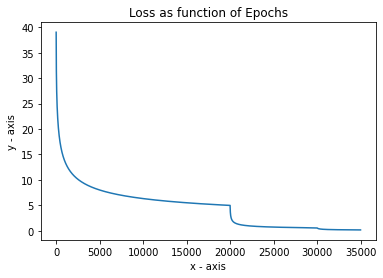

In [11]:
x=list(range(1,EPOCHS+1+15000))
y=losses
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Loss as function of Epochs')
plt.show()

In [12]:
losses[-1]

0.14670966450914916

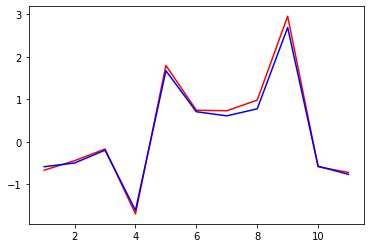

In [13]:
x=list(range(1,11+1))
plt.plot(x, W1_act.tolist(), 'r') 
plt.plot(x, W1.tolist(), 'b')  
plt.show()

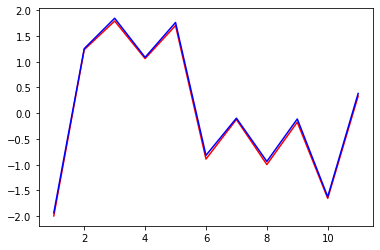

In [14]:
x=list(range(1,11+1))
plt.plot(x, W2_act.tolist(), 'r') 
plt.plot(x, W2.tolist(), 'b') 
plt.show()